In [5]:
# Exercise 3: Regression with Multiple Variables
# Workflow and reasoning are detailed step-by-step in the comments.

# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load the training and test datasets
train_file_path = "dataset 02c_train.csv"  # Larger dataset (training)
test_file_path = "dataset_02c_train.csv"   # Smaller dataset (test)

dataset_train = pd.read_csv(train_file_path)
dataset_test = pd.read_csv(test_file_path)

# Step 3: Explore the datasets
print("Training Dataset Head:")#.head() shows the first few rows of the datasets.
print(dataset_train.head()) 
print("\nTraining Dataset Summary:")
print(dataset_train.describe())#provides statistical summaries (mean, standard deviation, min, max, etc.).


print("\nTest Dataset Head:")
print(dataset_test.head())
print("\nTest Dataset Summary:")
print(dataset_test.describe())



Training Dataset Head:
         x1        x2        x3  x4          y
0 -3.361891 -3.519344 -2.843333  -1 -23.289122
1 -4.726925 -4.459731 -2.899598  -1 -33.393639
2  4.516668  4.416888  1.569877   1  33.476685
3  2.729386  2.657646  1.860648   1  15.139739
4 -1.533387 -1.600535 -0.419600  -1  -7.173404

Training Dataset Summary:
               x1          x2          x3          x4           y
count  100.000000  100.000000  100.000000  100.000000  100.000000
mean    -0.179283   -0.192748   -0.135649   -0.020000   -3.479203
std      4.662020    4.567825    2.505139    1.004837   47.723101
min    -12.827972  -12.548368   -6.593054   -1.000000 -196.928950
25%     -3.455493   -3.501594   -1.842390   -1.000000  -22.988959
50%     -0.400671   -0.273129   -0.157613   -1.000000   -1.058794
75%      3.749941    3.683967    1.791530    1.000000   23.834406
max      9.560440    9.329076    5.387242    1.000000  116.318383

Test Dataset Head:
         x1        x2        x3  x4          y
0 -1.83

In [ ]:
# Step 4: Define independent variables (X) and dependent variable (y)
X_train = dataset_train[["x1", "x2", "x3", "x4"]]  # Independent variables for training
y_train = dataset_train["y"]  # Dependent variable for training


X_test = dataset_test[["x1", "x2", "x3", "x4"]]  # Independent variables for testing
y_test = dataset_test["y"]  # Dependent variable for testing

# Step 5: Train a linear regression model
model = LinearRegression()
# Train the model using the training dataset (X_train and y_train).
model.fit(X_train, y_train)
# Print intercept and coefficients
# y=w0+w1x1+w2x2+w3x3+w4x4
print("Model Intercept:", model.intercept_)  # Intercept of the regression line
print("Model Coefficients:", model.coef_)   # Coefficients of the features


# Step 6: Predict on the test dataset
# Use the trained model to predict values for y (dependent variable) in the test dataset
y_test_pred = model.predict(X_test)

# Step 7: Evaluate the model on the test dataset
# High R² (close to 1) and low RMSE suggest good performance.
test_mse = mean_squared_error(y_test, y_test_pred)  # Calculate Mean Squared Error
test_rmse = np.sqrt(test_mse)  # Manually calculate RMSE
test_r2 = r2_score(y_test, y_test_pred)  # R^2 score

print("\nTest RMSE:", test_rmse)
print("Test R^2:", test_r2)




Model Intercept: -1.5213543250052162
Model Coefficients: [ 15.37922745  -3.2692691    1.31344611 -17.37072888]

Test RMSE: 5.86862886946721
Test R^2: 0.9711129503151208


In [7]:
# Step 8: Output the coefficients and intercept
print("\nModel Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)




Model Coefficients: [ 15.37922745  -3.2692691    1.31344611 -17.37072888]
Model Intercept: -1.5213543250052162


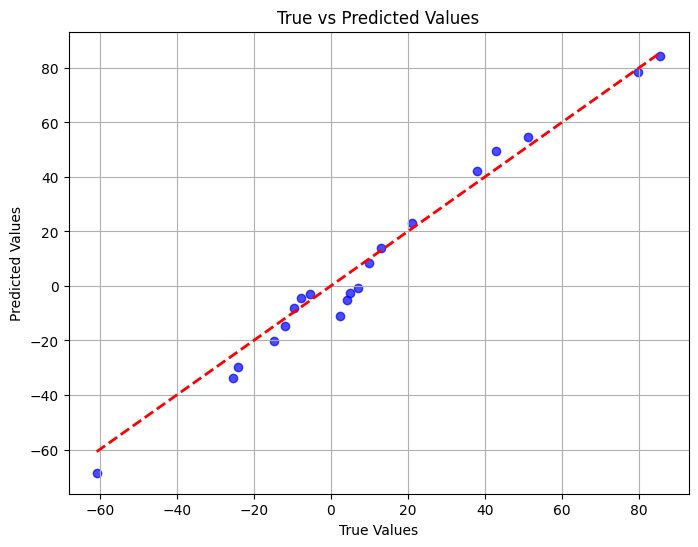

In [8]:
# Step 9: Visualizations
# 9.1: Scatter plot of true vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title('True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()




Each blue point represents a single data point from the test dataset.
The x-coordinate of a blue point corresponds to the true value (the actual 𝑦 value from the dataset).
The y-coordinate of the blue point corresponds to the predicted value (the value predicted by the linear regression model).

Red Line:
The red dashed line represents the line of perfect predictions, where the true values are exactly equal to the predicted values.
The equation of this line is 𝑦=𝑥
If a point lies directly on this line, it means the model's prediction for that data point was perfect.
Interpretation:
Points that are closer to the red line indicate better predictions (the true and predicted values are very close).
Points further away from the red line indicate larger errors or residuals (the difference between the true and predicted values).
If a blue point is at (-40, -30):
-40 (x-coordinate) is the true value.
-30  (y-coordinate) is the predicted value for the same data point.
If there's one blue point at (20,25):
20: The actual 𝑦 value (true value from the test dataset).
25: The predicted y value (predicted by the linear regression model).
The distance between this point and the red line indicates the error (residual) for this prediction:
residuals= 20-25= -5



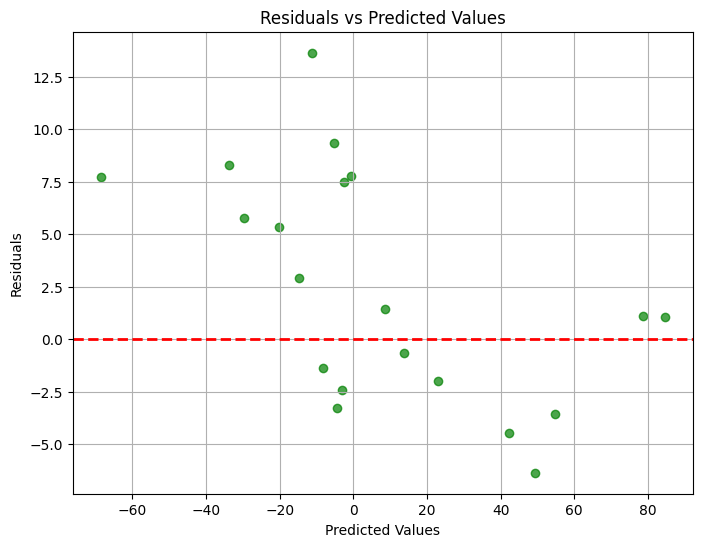

In [9]:
# 9.2: Residual plot
# Display the residuals (difference between true and predicted values).
residuals = y_test - y_test_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test_pred, residuals, color='green', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()



Predicted Values (X-axis): 
These are the values predicted by linear regression model
Each point's x-coordinate corresponds to one prediction made by the model.
Residuals (Y-axis):
Residuals are the difference between the true values and the predicted values
A positive residual means the model under-predicted the true value.
A negative residual means the model over-predicted the true value.

Points (Green Dots):
Each green dot represents one observation in your test dataset.
The x-coordinate is the predicted value
The y-coordinate is the residual for that observation.

Red Dashed Line:
This is the zero-residual line
If a point lies exactly on this line, it means the model's prediction was perfect for that observation 

Interpretation:
The spread of points above and below the red line shows how well the model is performing.
Ideally, residuals should be:
Randomly scattered around the zero line.
Uniformly distributed, with no clear pattern or trend.
Any visible trend (e.g., a curve or clustering) might indicate that the model is missing some pattern in the data or is not fitting perfectly.
If a point is at (50,5):
The predicted value is 50
The residual is 5, meaning the true value is 50+5=55
If a point is at (-30,-3)
The predicted value is -30
The residual is -3, meaning the true value is -30-3=-33



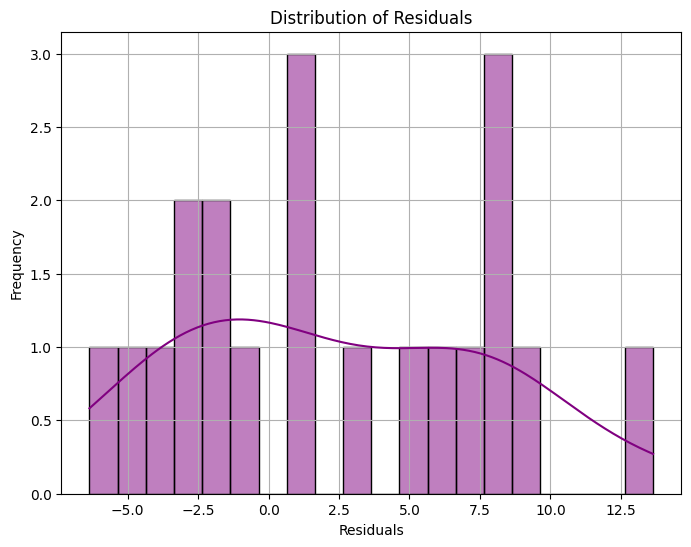

In [10]:
# 9.3: Distribution of residuals
# Check if residuals are normally distributed
# A normal residual distribution implies the model captures the data well.
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='purple', bins=20)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Step 10: Summary of workflow
# - Loaded the larger dataset as the training dataset.
# - Loaded the smaller dataset as the test dataset.
# - Defined independent and dependent variables for both datasets.
# - Trained a linear regression model using the training dataset.
# - Predicted values for the test dataset and evaluated performance metrics (RMSE, R^2).
# - Visualized the true vs. predicted values, residuals, and residual distribution.
# - Output the model coefficients and intercept to understand the relationships between variables.

X-axis (Residuals):
These are the differences between the true and predicted values.
Y-axis (Frequency):
Shows how often each residual value (or range of values) appears in the dataset.
Histogram (Purple Bars):
Represents the frequency of residuals grouped into bins.
Each bar's height indicates how many residuals fall within a specific range.

Kernel Density Estimation (KDE) Curve (Purple Line):
A smoothed line showing the distribution of residuals.
Peaks in the curve indicate where most residuals are concentrated.

Are Residuals Normally Distributed?
To determine whether residuals are normally distributed:
Symmetry:
A normal distribution is symmetric around 0.
In this graph, the residuals are not perfectly symmetric, with more variability on the positive side.

Peak at 0:
For normality, the residuals should cluster around 0.
This graph does show a concentration near 0 but has noticeable peaks around other values (e.g., 7.5).
Shape of KDE Curve:
A normal distribution should look like a smooth, bell-shaped curve.
Here, the curve has irregular peaks, suggesting deviations from normality.
Gaps and Outliers:
The histogram has gaps between bars, which might indicate that residuals are unevenly distributed.
Additionally, the KDE curve appears to have multiple modes (peaks), which is not characteristic of normality.
The residuals do not appear to be normally distributed.
They show irregular clustering, asymmetry, and multiple peaks, indicating the model may not fully capture the underlying data patterns.
This might suggest issues such as:
Nonlinear relationships in the data.
Omitted variables.
Heteroscedasticity (non-constant variance of residuals).

